### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics as metrics
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

### Extracting x_train datas

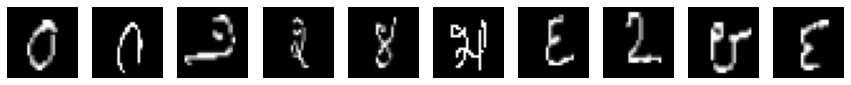




       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
59999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
59999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
59999         0         0         0         0         0  

[1 rows x 784 columns]


In [2]:
x_train_load = np.load(r'Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST\X_kannada_MNIST_train.npz')

for i in x_train_load.files:
    x_train_result = x_train_load[i]
    count = x_train_result.shape[0]
    
x_train = x_train_result.reshape(count, -1)
train_df = pd.DataFrame(x_train)
train_df.columns = ['pixel'+str(i) for i in range(x_train.shape[1])]

fig, ax = plt.subplots(1,10, figsize=(15,5))
for i in range(10):
    plt.gray()
    ax[i].imshow(x_train[i].reshape(28,28))
    ax[i].axis('off')
plt.show()
print('\n\n')
print(train_df.tail(1))

### Extracting x_test datas

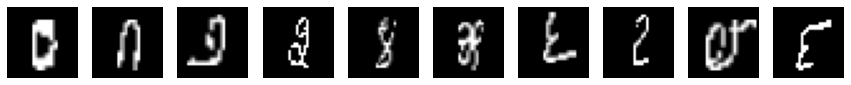




      pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
9999       0       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
9999       0  ...         0         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  
9999         0         0         0         0  

[1 rows x 784 columns]


In [3]:
x_test_load = np.load(r'Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST\X_kannada_MNIST_test.npz')

for i in x_test_load.files:
    x_test_result = x_test_load[i]
    count = x_test_result.shape[0]
    
x_test = x_test_result.reshape(count, -1)
test_df = pd.DataFrame(x_test)
test_df.columns = ['pixel'+str(i) for i in range(x_test.shape[1])]

fig, ax = plt.subplots(1,10, figsize=(15,5))
for i in range(10):
    plt.gray()
    ax[i].imshow(x_test[i].reshape(28,28))
    ax[i].axis('off')
plt.show()

print('\n\n')
print(test_df.tail(1))

### Extracting y_train datas

In [4]:
y_train_load = np.load(r'Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST\y_kannada_MNIST_train.npz')
for i in y_train_load.files:
    y_train = y_train_load[i]
print(y_train)

[0 1 2 ... 7 8 9]


### Extracting y_test datas

In [5]:
y_test_load = np.load(r'Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST\y_kannada_MNIST_test.npz')
for i in y_test_load.files:
    y_test = y_test_load[i]
print(y_test)

[0 1 2 ... 7 8 9]


In [6]:
print('x train length : ', len(x_train))
print('y train length : ', len(y_train))
print('x test  length : ', len(x_test))
print('y test  length : ', len(y_test))

x train length :  60000
y train length :  60000
x test  length :  10000
y test  length :  10000


In [7]:
print('x train shape : ', x_train.shape)
print('x test  shape : ', x_test.shape)
print('y train shape : ', y_train.shape)
print('y test  shape : ', y_test.shape)

x train shape :  (60000, 784)
x test  shape :  (10000, 784)
y train shape :  (60000,)
y test  shape :  (10000,)


### Standadization

In [8]:
scale = StandardScaler()

x_train_std = scale.fit_transform(x_train)
x_test_std  = scale.transform(x_test)

### Dimensionality Reduction by using PCA method size == 10

In [9]:
pca10 = PCA(n_components=10)
x_train_pca10 = pca10.fit_transform(x_train_std)
x_test_pca10  = pca10.transform(x_test_std)
print('most important pixels selected : ', len(pca10.explained_variance_))
print('\n',pca10.explained_variance_)
print('sample size : ', pca10.n_samples_)

most important pixels selected :  10

 [32.0517204  27.34126879 20.91320653 15.29685522 14.55836576 12.96386073
 10.6335182   9.55256404  9.047396    7.85451123]
sample size :  60000


In [10]:
x_train_pca10[505]

array([-1.97421431,  1.29320008,  0.95783598,  0.50340841,  1.50022438,
       -1.21327239, -0.79757715,  3.08330755,  2.12361411, -2.841836  ])

In [11]:
y_train[505]

5

### Creating a function to running a model

In [12]:
def model(model, x_train, x_test, y_train, y_test, model_type=1):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)
    print(model)
    print('\nAccuracy Score \n')
    print('Training Score : ', accuracy_score(y_train, y_train_pred))
    print('Testing  Score : ', accuracy_score(y_test, y_test_pred))
    print('\nPrecision Score : ', precision_score(y_test, y_test_pred, average = 'weighted'))
    print('Recall Score : ', recall_score(y_test, y_test_pred, average = 'weighted'))
    print('F1 Score : ', f1_score(y_test, y_test_pred, average = 'weighted'))
    print('\nClassification Report')
    print(classification_report(y_test, y_test_pred))
    print('\nConfusion Matrix')
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu')
    plt.show()
    
    if model_type == 1:
        probs = lr.predict_proba(x_test)
        n_classes = probs.shape[1]
        fpr,tpr,roc_auc = dict(),dict(),dict()
        for i in range(n_classes):
            y_true = np.where(y_test==i,1,0)
            y_scores = probs[:,i]
            fpr[i],tpr[i],threshold = metrics.roc_curve(y_true, y_scores)
            roc_auc[i] = metrics.auc(fpr[i], tpr[i])

        plt.figure(figsize=(10,6))
        sns.set_context('paper', font_scale=1)
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label = f'Class {i}  (AUC = %.2f)'% roc_auc[i] )
        plt.title('Receiver Operating Characteristic')
        plt.plot([0,1], 'r--')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='best', fontsize=10)
        plt.show()

In [13]:
print(x_train_pca10.shape)
print(y_train.shape)
print(x_test_pca10.shape)
print(y_test.shape)

(60000, 10)
(60000,)
(10000, 10)
(10000,)


### MODELS (size == 10)

LogisticRegression()

Accuracy Score 

Training Score :  0.9034333333333333
Testing  Score :  0.802

Precision Score :  0.8022957104954399
Recall Score :  0.802
F1 Score :  0.7998478209094179

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1000
           1       0.80      0.84      0.82      1000
           2       0.96      0.97      0.97      1000
           3       0.70      0.81      0.75      1000
           4       0.76      0.89      0.82      1000
           5       0.84      0.77      0.80      1000
           6       0.75      0.65      0.70      1000
           7       0.68      0.58      0.63      1000
           8       0.85      0.89      0.87      1000
           9       0.83      0.88      0.85      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000


Confusion Matrix


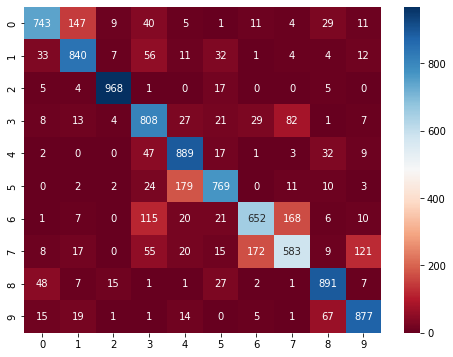

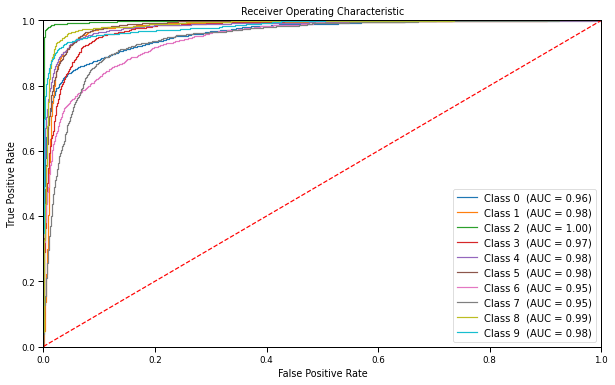




DecisionTreeClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.8

Precision Score :  0.8008007301619227
Recall Score :  0.8
F1 Score :  0.7993090696870994

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1000
           1       0.79      0.81      0.80      1000
           2       0.97      0.97      0.97      1000
           3       0.71      0.80      0.76      1000
           4       0.74      0.83      0.78      1000
           5       0.82      0.75      0.78      1000
           6       0.76      0.74      0.75      1000
           7       0.73      0.63      0.68      1000
           8       0.84      0.84      0.84      1000
           9       0.87      0.88      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000


Confusion Matrix


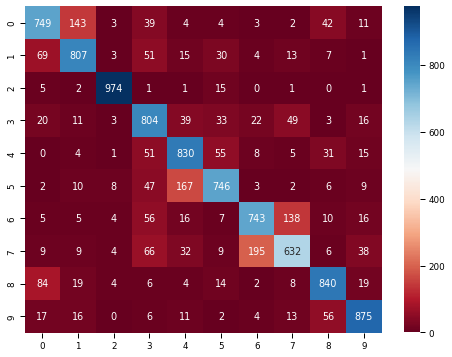

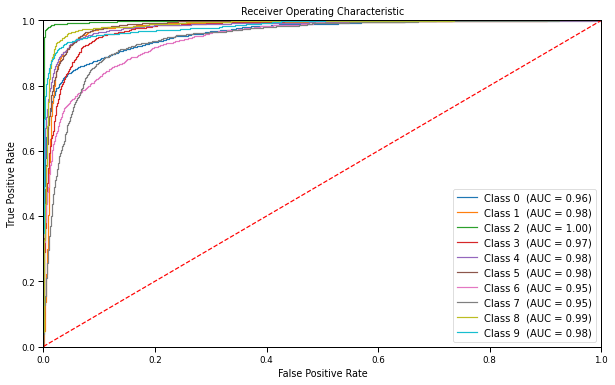




RandomForestClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.8621

Precision Score :  0.8656979029352838
Recall Score :  0.8621
F1 Score :  0.8617191985895964

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1000
           1       0.82      0.90      0.86      1000
           2       0.99      0.98      0.99      1000
           3       0.76      0.89      0.82      1000
           4       0.80      0.88      0.84      1000
           5       0.89      0.81      0.85      1000
           6       0.84      0.81      0.83      1000
           7       0.85      0.71      0.78      1000
           8       0.87      0.93      0.90      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000


Confusion Matrix


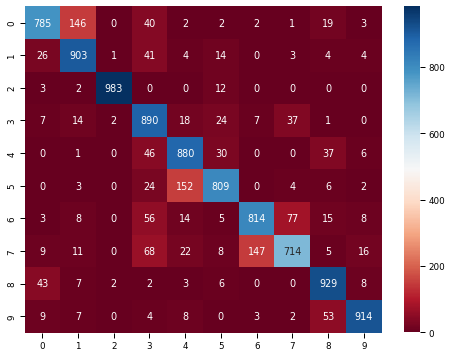

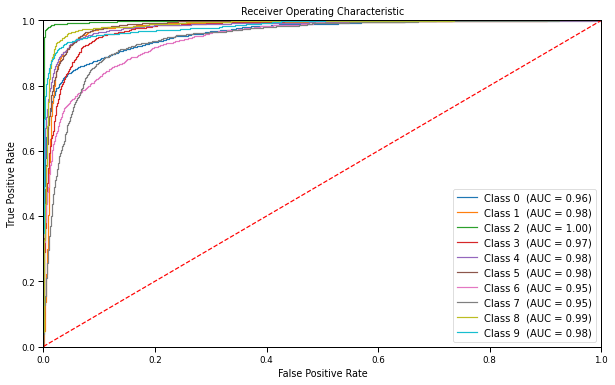




GaussianNB()

Accuracy Score 

Training Score :  0.8413833333333334
Testing  Score :  0.7293

Precision Score :  0.7540123479055448
Recall Score :  0.7293
F1 Score :  0.7299033502573603

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.77      0.71      0.74      1000
           2       0.98      0.97      0.98      1000
           3       0.49      0.85      0.62      1000
           4       0.61      0.83      0.70      1000
           5       0.80      0.61      0.69      1000
           6       0.79      0.72      0.76      1000
           7       0.65      0.40      0.50      1000
           8       0.81      0.74      0.77      1000
           9       0.89      0.78      0.84      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000


Confusion Matrix


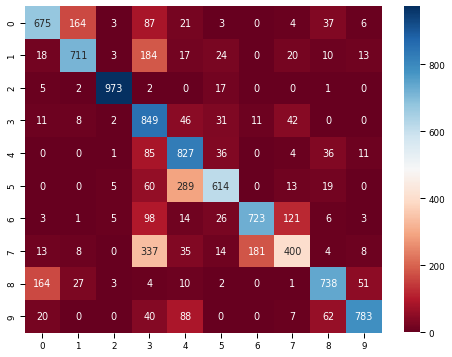

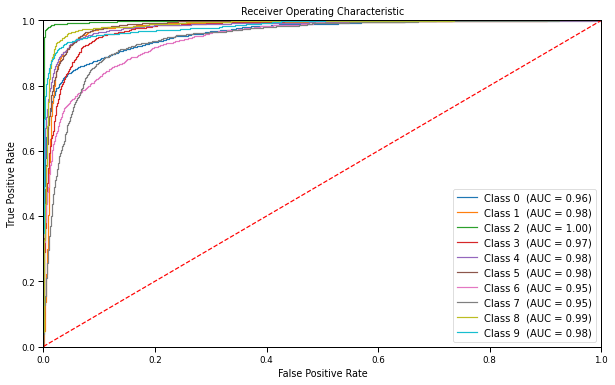




KNeighborsClassifier()

Accuracy Score 

Training Score :  0.9678833333333333
Testing  Score :  0.8755

Precision Score :  0.8784553269358154
Recall Score :  0.8755
F1 Score :  0.8749377221337354

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1000
           1       0.82      0.94      0.88      1000
           2       1.00      0.99      0.99      1000
           3       0.80      0.87      0.83      1000
           4       0.80      0.91      0.85      1000
           5       0.90      0.82      0.86      1000
           6       0.83      0.83      0.83      1000
           7       0.86      0.71      0.78      1000
           8       0.91      0.94      0.93      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000


Confusion Matrix


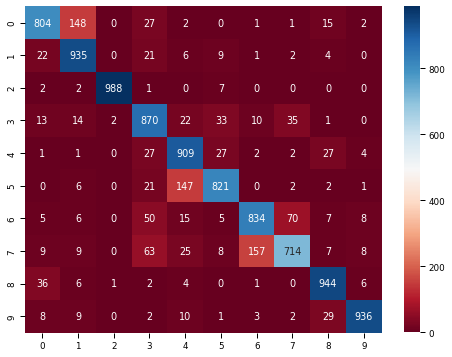

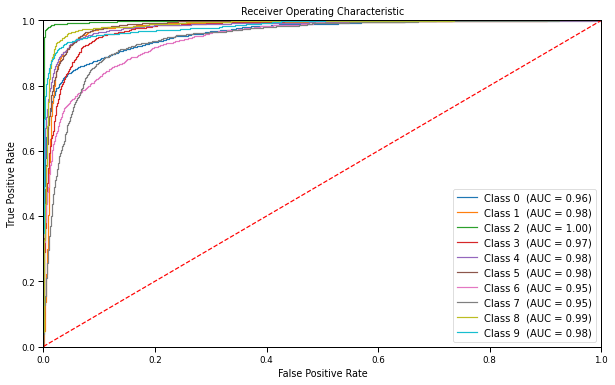




SVC()

Accuracy Score 

Training Score :  0.956
Testing  Score :  0.8806

Precision Score :  0.8839184975050739
Recall Score :  0.8806
F1 Score :  0.8802649635223027

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1000
           1       0.84      0.91      0.87      1000
           2       0.99      0.99      0.99      1000
           3       0.77      0.88      0.82      1000
           4       0.82      0.91      0.86      1000
           5       0.92      0.85      0.88      1000
           6       0.85      0.81      0.83      1000
           7       0.86      0.74      0.80      1000
           8       0.90      0.97      0.93      1000
           9       0.96      0.93      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix


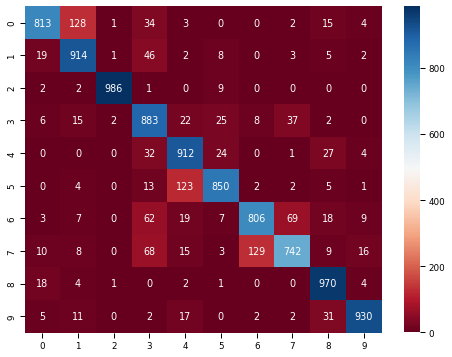

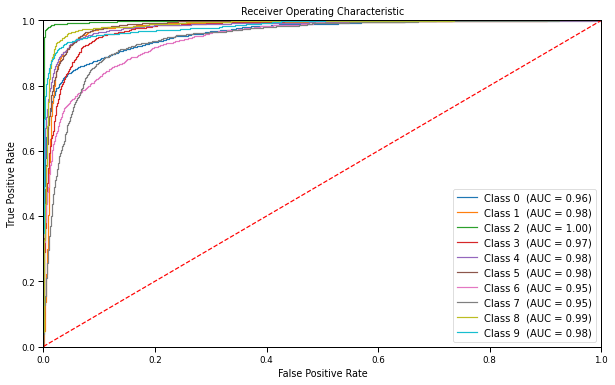




support vector machine : 0.8806
logistic regression : 0.802
Gassian naive bayes : 0.7293
k nearest neighbors : 0.8755
Decision Tree       : 0.8
Random forest       : 0.8621


In [14]:
lr = LogisticRegression()
model(lr,x_train_pca10, x_test_pca10, y_train, y_test)
print('\n\n')
tree = DecisionTreeClassifier()
model(tree, x_train_pca10, x_test_pca10, y_train, y_test)
print('\n\n')
rf = RandomForestClassifier()
model(rf, x_train_pca10, x_test_pca10, y_train, y_test)
print('\n\n')
gnb = GaussianNB()
model(gnb, x_train_pca10, x_test_pca10, y_train, y_test)
print('\n\n')
knn = KNeighborsClassifier()
model(knn, x_train_pca10, x_test_pca10, y_train, y_test)
print('\n\n')
svm = SVC()
model(svm, x_train_pca10, x_test_pca10, y_train, y_test) 
print('\n\n')
print(f'support vector machine : {svm.score(x_test_pca10, y_test)}')
print(f'logistic regression : {lr.score(x_test_pca10, y_test)}')
print(f'Gassian naive bayes : {gnb.score(x_test_pca10, y_test)}')
print(f'k nearest neighbors : {knn.score(x_test_pca10, y_test)}')
print(f'Decision Tree       : {tree.score(x_test_pca10, y_test)}')
print(f'Random forest       : {rf.score(x_test_pca10, y_test)}')

### Dimensionality reduction by using PCA method (size == 15)

In [15]:
pca15 = PCA(n_components=15)
x_train_pca15 = pca15.fit_transform(x_train_std)
x_test_pca15  = pca15.transform(x_test_std)

### MODELS (size == 15)

LogisticRegression()

Accuracy Score 

Training Score :  0.92795
Testing  Score :  0.8492

Precision Score :  0.8504239596011645
Recall Score :  0.8492
F1 Score :  0.8482319314103178

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1000
           1       0.80      0.88      0.84      1000
           2       0.97      0.98      0.98      1000
           3       0.83      0.83      0.83      1000
           4       0.79      0.91      0.85      1000
           5       0.90      0.78      0.84      1000
           6       0.81      0.78      0.80      1000
           7       0.77      0.72      0.74      1000
           8       0.87      0.94      0.90      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix


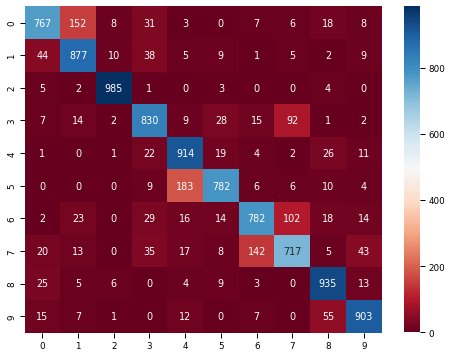

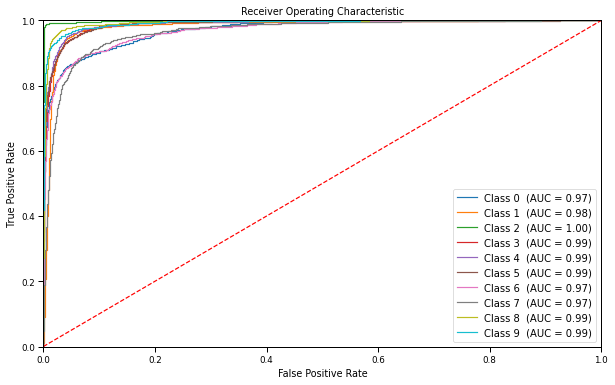




DecisionTreeClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.8177

Precision Score :  0.817505202307238
Recall Score :  0.8177
F1 Score :  0.8171742364358219

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.80      0.84      0.82      1000
           2       0.96      0.98      0.97      1000
           3       0.76      0.77      0.77      1000
           4       0.76      0.82      0.79      1000
           5       0.82      0.78      0.80      1000
           6       0.81      0.80      0.80      1000
           7       0.77      0.70      0.73      1000
           8       0.83      0.85      0.84      1000
           9       0.88      0.87      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000


Confusion Matrix


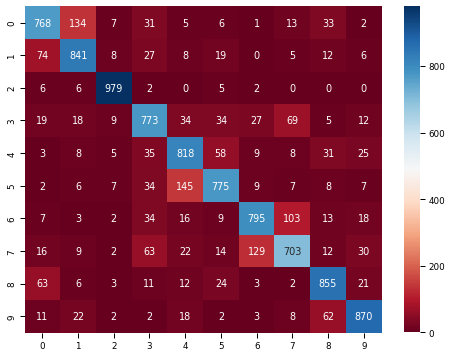

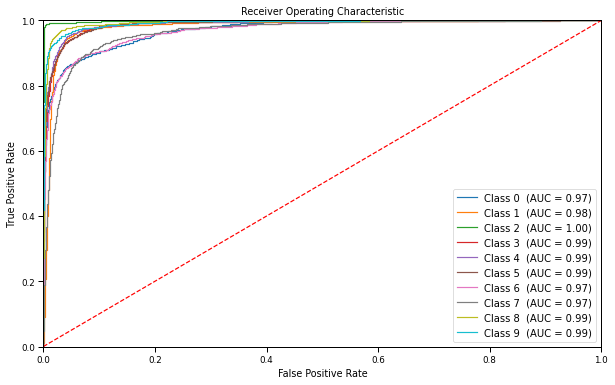




RandomForestClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.8847

Precision Score :  0.8876963638934698
Recall Score :  0.8847
F1 Score :  0.8842190522384943

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1000
           1       0.83      0.93      0.87      1000
           2       1.00      0.99      0.99      1000
           3       0.84      0.90      0.87      1000
           4       0.80      0.91      0.85      1000
           5       0.91      0.82      0.86      1000
           6       0.87      0.87      0.87      1000
           7       0.87      0.76      0.81      1000
           8       0.89      0.96      0.92      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


Confusion Matrix


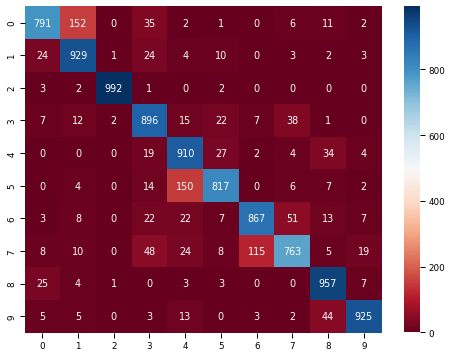

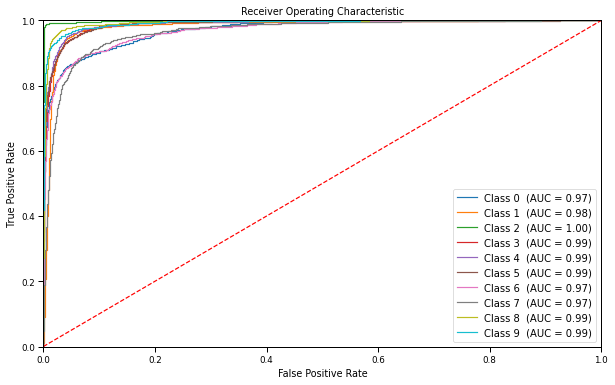




GaussianNB()

Accuracy Score 

Training Score :  0.8595
Testing  Score :  0.7461

Precision Score :  0.7662767505135047
Recall Score :  0.7461
F1 Score :  0.7444146026988135

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.78      0.72      0.74      1000
           2       0.97      0.98      0.97      1000
           3       0.52      0.87      0.65      1000
           4       0.65      0.85      0.74      1000
           5       0.86      0.61      0.71      1000
           6       0.80      0.79      0.80      1000
           7       0.66      0.39      0.49      1000
           8       0.78      0.74      0.76      1000
           9       0.92      0.82      0.87      1000

    accuracy                           0.75     10000
   macro avg       0.77      0.75      0.74     10000
weighted avg       0.77      0.75      0.74     10000


Confusion Matrix


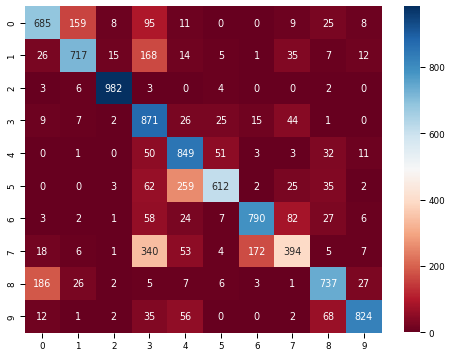

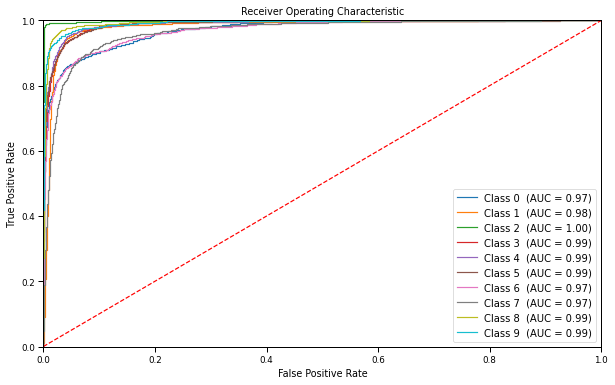




KNeighborsClassifier()

Accuracy Score 

Training Score :  0.9781333333333333
Testing  Score :  0.8982

Precision Score :  0.9018576950159495
Recall Score :  0.8982
F1 Score :  0.8980129280982962

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1000
           1       0.83      0.95      0.88      1000
           2       0.99      0.99      0.99      1000
           3       0.88      0.88      0.88      1000
           4       0.79      0.93      0.86      1000
           5       0.93      0.84      0.88      1000
           6       0.87      0.89      0.88      1000
           7       0.89      0.78      0.83      1000
           8       0.93      0.96      0.95      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix


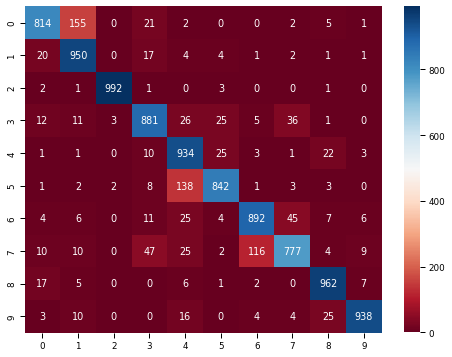

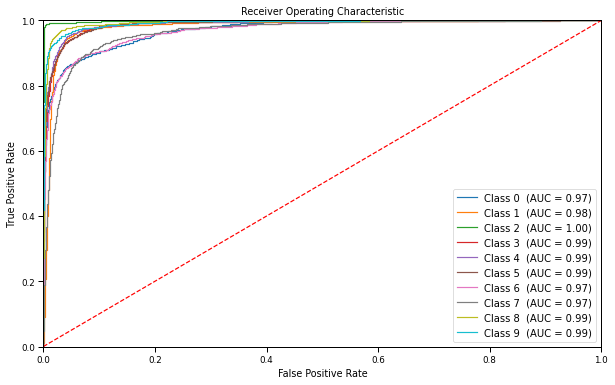




SVC()

Accuracy Score 

Training Score :  0.97195
Testing  Score :  0.9039

Precision Score :  0.9068372538171662
Recall Score :  0.9039
F1 Score :  0.903575741541975

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1000
           1       0.84      0.94      0.88      1000
           2       0.99      0.99      0.99      1000
           3       0.88      0.89      0.89      1000
           4       0.82      0.95      0.88      1000
           5       0.94      0.85      0.89      1000
           6       0.88      0.89      0.89      1000
           7       0.90      0.80      0.84      1000
           8       0.92      0.98      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000


Confusion Matrix


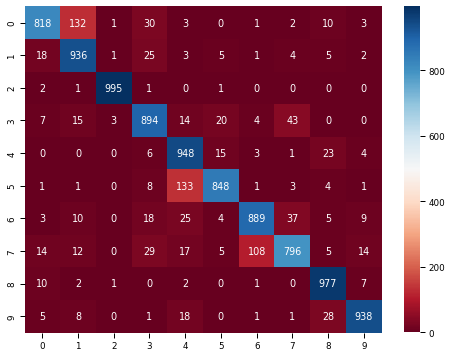

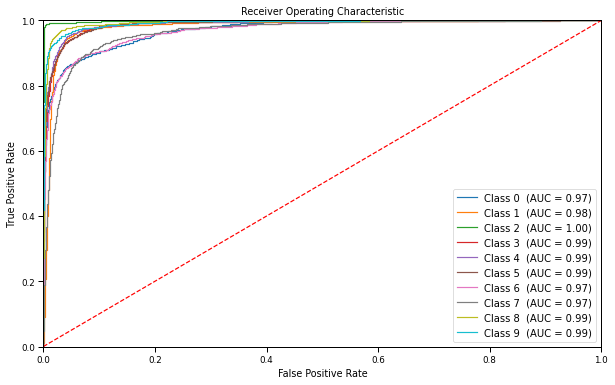




support vector machine : 0.9039
logistic regression : 0.8492
Gassian naive bayes : 0.7461
k nearest neighbors : 0.8982
Decision Tree       : 0.8177
Random forest       : 0.8847


In [16]:
lr = LogisticRegression()
model(lr,x_train_pca15, x_test_pca15, y_train, y_test)
print('\n\n')
tree = DecisionTreeClassifier()
model(tree, x_train_pca15, x_test_pca15, y_train, y_test)
print('\n\n')
rf = RandomForestClassifier()
model(rf, x_train_pca15, x_test_pca15, y_train, y_test)
print('\n\n')
gnb = GaussianNB()
model(gnb, x_train_pca15, x_test_pca15, y_train, y_test)
print('\n\n')
knn = KNeighborsClassifier()
model(knn, x_train_pca15, x_test_pca15, y_train, y_test)
print('\n\n')
svm = SVC()
model(svm, x_train_pca15, x_test_pca15, y_train, y_test) 
print('\n\n')
print(f'support vector machine : {svm.score(x_test_pca15, y_test)}')
print(f'logistic regression : {lr.score(x_test_pca15, y_test)}')
print(f'Gassian naive bayes : {gnb.score(x_test_pca15, y_test)}')
print(f'k nearest neighbors : {knn.score(x_test_pca15, y_test)}')
print(f'Decision Tree       : {tree.score(x_test_pca15, y_test)}')
print(f'Random forest       : {rf.score(x_test_pca15, y_test)}')

### Dimensionality reduction by using PCA method  (size == 20)

In [17]:
pca20 = PCA(n_components=20)
x_train_pca20 = pca20.fit_transform(x_train_std)
x_test_pca20  = pca20.transform(x_test_std)

### MODELS (size == 20)

LogisticRegression()

Accuracy Score 

Training Score :  0.9404833333333333
Testing  Score :  0.8618

Precision Score :  0.8630837450794042
Recall Score :  0.8618
F1 Score :  0.8608929529976889

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1000
           1       0.80      0.88      0.84      1000
           2       0.97      0.98      0.97      1000
           3       0.84      0.83      0.84      1000
           4       0.80      0.92      0.86      1000
           5       0.89      0.80      0.84      1000
           6       0.83      0.83      0.83      1000
           7       0.80      0.73      0.76      1000
           8       0.88      0.94      0.91      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion Matrix


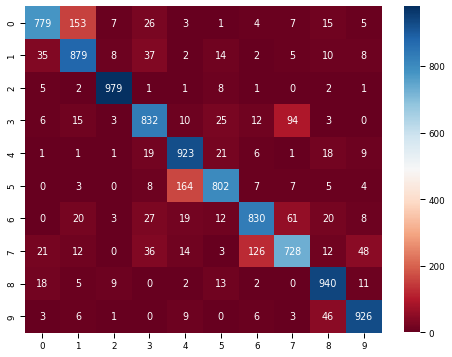

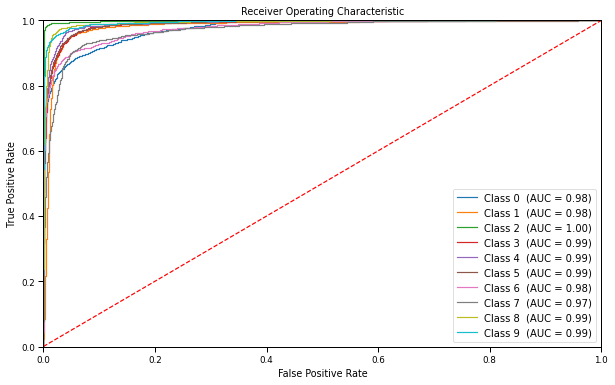




DecisionTreeClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.82

Precision Score :  0.8210583643773822
Recall Score :  0.82
F1 Score :  0.8196705672261853

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1000
           1       0.80      0.84      0.82      1000
           2       0.98      0.98      0.98      1000
           3       0.75      0.79      0.77      1000
           4       0.74      0.83      0.79      1000
           5       0.85      0.77      0.81      1000
           6       0.80      0.80      0.80      1000
           7       0.76      0.69      0.73      1000
           8       0.82      0.85      0.84      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000


Confusion Matrix


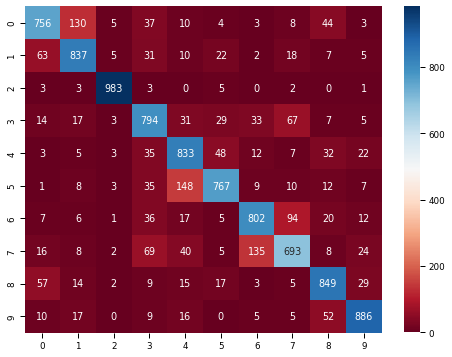

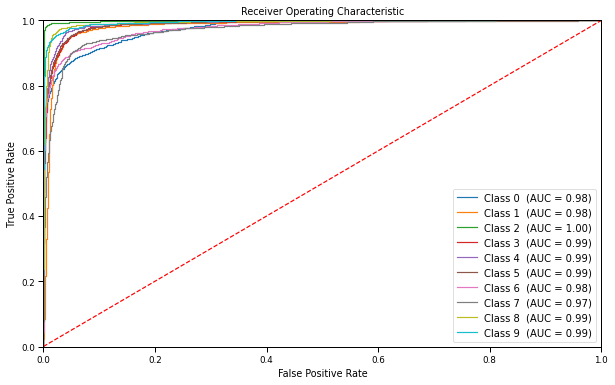




RandomForestClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.8931

Precision Score :  0.8959539284218896
Recall Score :  0.8931
F1 Score :  0.8927286076106419

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.81      0.87      1000
           1       0.84      0.93      0.89      1000
           2       1.00      0.99      0.99      1000
           3       0.87      0.90      0.88      1000
           4       0.80      0.92      0.86      1000
           5       0.92      0.83      0.87      1000
           6       0.87      0.88      0.87      1000
           7       0.90      0.78      0.83      1000
           8       0.89      0.95      0.92      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000


Confusion Matrix


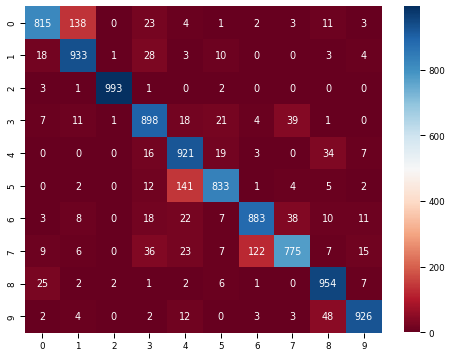

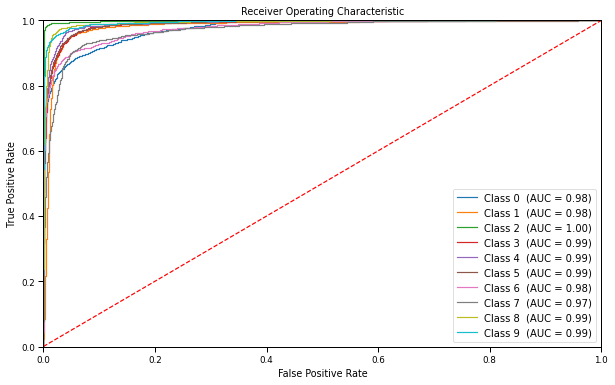




GaussianNB()

Accuracy Score 

Training Score :  0.86605
Testing  Score :  0.7563

Precision Score :  0.7740165812610614
Recall Score :  0.7563
F1 Score :  0.7533796102589163

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1000
           1       0.78      0.70      0.74      1000
           2       0.93      0.98      0.96      1000
           3       0.54      0.88      0.67      1000
           4       0.69      0.86      0.76      1000
           5       0.86      0.60      0.70      1000
           6       0.81      0.80      0.81      1000
           7       0.73      0.43      0.54      1000
           8       0.76      0.73      0.74      1000
           9       0.92      0.88      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000


Confusion Matrix


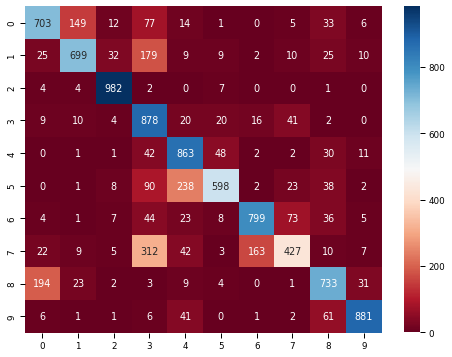

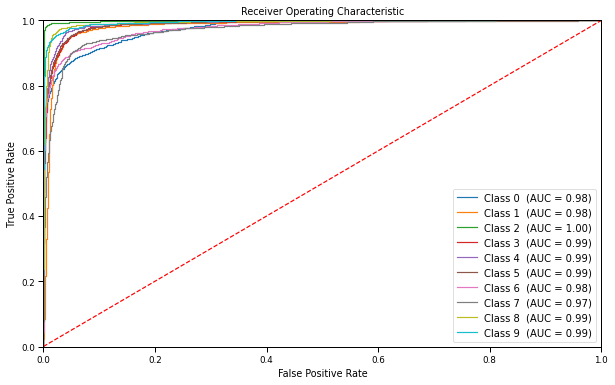




KNeighborsClassifier()

Accuracy Score 

Training Score :  0.9820666666666666
Testing  Score :  0.907

Precision Score :  0.9100887016272527
Recall Score :  0.907
F1 Score :  0.906776388882427

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1000
           1       0.85      0.96      0.90      1000
           2       1.00      0.99      0.99      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.94      0.87      1000
           5       0.93      0.86      0.90      1000
           6       0.87      0.90      0.89      1000
           7       0.91      0.78      0.84      1000
           8       0.93      0.96      0.94      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Confusion Matrix


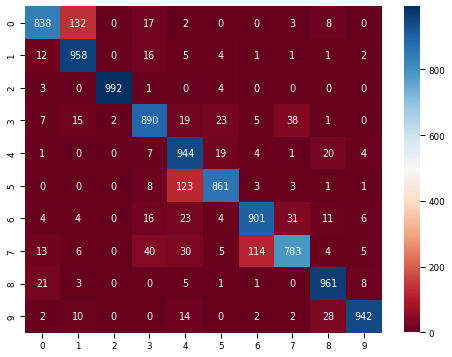

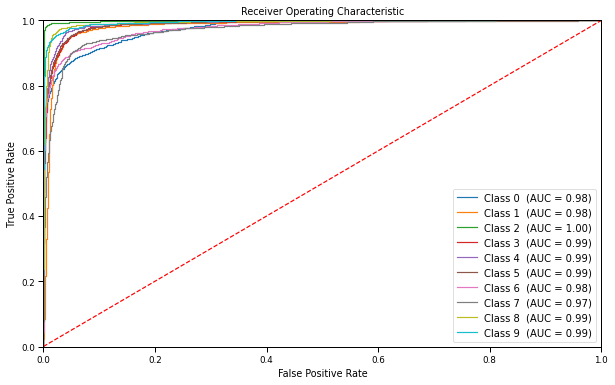




SVC()

Accuracy Score 

Training Score :  0.9771833333333333
Testing  Score :  0.9151

Precision Score :  0.917854351806092
Recall Score :  0.9151
F1 Score :  0.9149063557028718

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1000
           1       0.86      0.94      0.90      1000
           2       0.99      0.99      0.99      1000
           3       0.89      0.90      0.90      1000
           4       0.83      0.95      0.88      1000
           5       0.95      0.87      0.91      1000
           6       0.89      0.91      0.90      1000
           7       0.93      0.81      0.87      1000
           8       0.93      0.98      0.96      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000


Confusion Matrix


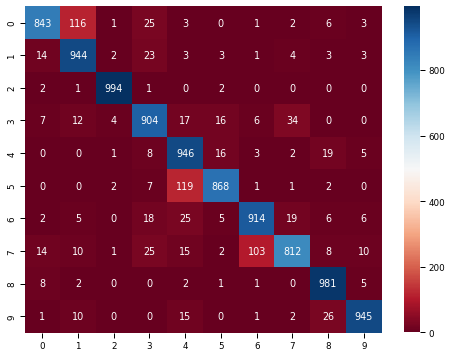

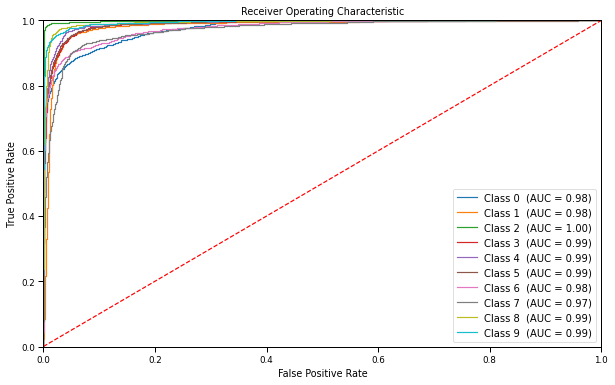




support vector machine : 0.9151
logistic regression : 0.8618
Gassian naive bayes : 0.7563
k nearest neighbors : 0.907
Decision Tree       : 0.82
Random forest       : 0.8931


In [18]:
lr = LogisticRegression()
model(lr,x_train_pca20, x_test_pca20, y_train, y_test)
print('\n\n')
tree = DecisionTreeClassifier()
model(tree, x_train_pca20, x_test_pca20, y_train, y_test)
print('\n\n')
rf = RandomForestClassifier()
model(rf, x_train_pca20, x_test_pca20, y_train, y_test)
print('\n\n')
gnb = GaussianNB()
model(gnb, x_train_pca20, x_test_pca20, y_train, y_test)
print('\n\n')
knn = KNeighborsClassifier()
model(knn, x_train_pca20, x_test_pca20, y_train, y_test)
print('\n\n')
svm = SVC()
model(svm, x_train_pca20, x_test_pca20, y_train, y_test) 
print('\n\n')
print(f'support vector machine : {svm.score(x_test_pca20, y_test)}')
print(f'logistic regression : {lr.score(x_test_pca20, y_test)}')
print(f'Gassian naive bayes : {gnb.score(x_test_pca20, y_test)}')
print(f'k nearest neighbors : {knn.score(x_test_pca20, y_test)}')
print(f'Decision Tree       : {tree.score(x_test_pca20, y_test)}')
print(f'Random forest       : {rf.score(x_test_pca20, y_test)}')

### Dimensionality reduction by using PCA method  (size == 25)

In [19]:
pca25 = PCA(n_components=25)
x_train_pca25 = pca25.fit_transform(x_train_std)
x_test_pca25  = pca25.transform(x_test_std)

### MODELS  (size == 25)

LogisticRegression()

Accuracy Score 

Training Score :  0.94725
Testing  Score :  0.8687

Precision Score :  0.8698297846948769
Recall Score :  0.8687
F1 Score :  0.8678780716882788

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1000
           1       0.82      0.89      0.85      1000
           2       0.98      0.98      0.98      1000
           3       0.85      0.84      0.84      1000
           4       0.81      0.92      0.86      1000
           5       0.87      0.83      0.85      1000
           6       0.84      0.85      0.85      1000
           7       0.84      0.74      0.78      1000
           8       0.89      0.94      0.91      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix


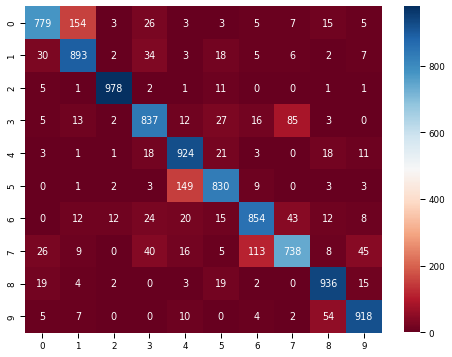

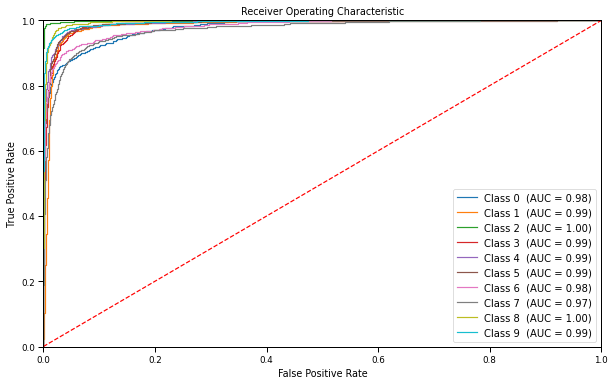




DecisionTreeClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.822

Precision Score :  0.8222927370419016
Recall Score :  0.822
F1 Score :  0.821506410218884

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1000
           1       0.81      0.83      0.82      1000
           2       0.98      0.98      0.98      1000
           3       0.77      0.78      0.77      1000
           4       0.75      0.83      0.79      1000
           5       0.82      0.78      0.80      1000
           6       0.79      0.80      0.79      1000
           7       0.77      0.69      0.73      1000
           8       0.83      0.86      0.85      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000


Confusion Matrix


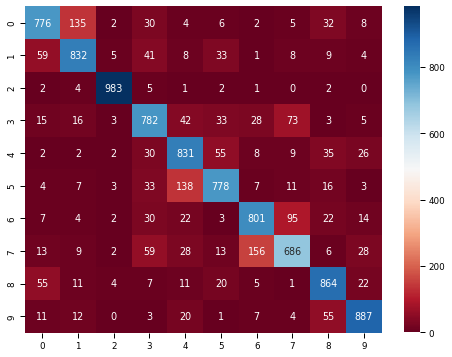

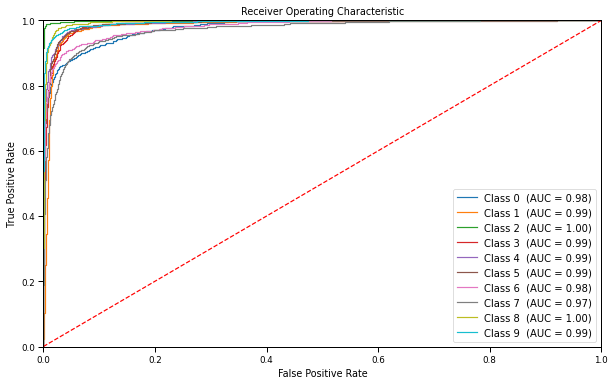




RandomForestClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.8961

Precision Score :  0.8989398518665407
Recall Score :  0.8961
F1 Score :  0.8958341571613139

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1000
           1       0.84      0.93      0.88      1000
           2       1.00      0.99      0.99      1000
           3       0.88      0.90      0.89      1000
           4       0.81      0.92      0.86      1000
           5       0.92      0.84      0.88      1000
           6       0.88      0.88      0.88      1000
           7       0.91      0.80      0.85      1000
           8       0.89      0.95      0.92      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix


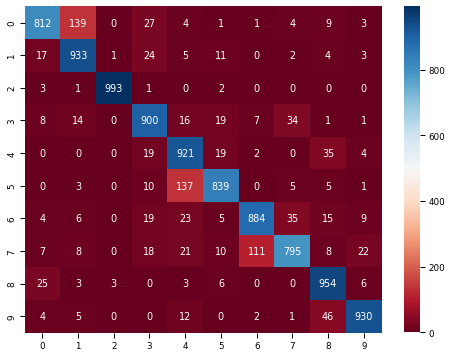

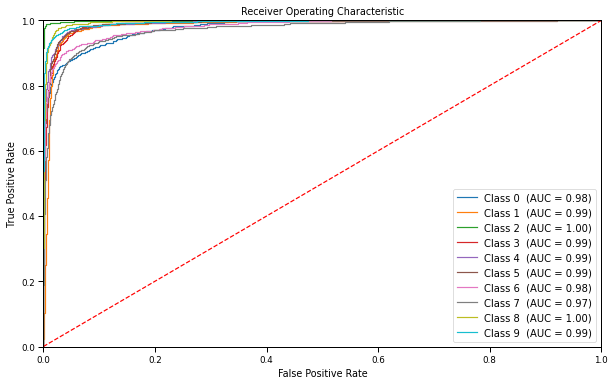




GaussianNB()

Accuracy Score 

Training Score :  0.8714166666666666
Testing  Score :  0.7615

Precision Score :  0.776238096649966
Recall Score :  0.7615
F1 Score :  0.7589927125132631

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.79      0.70      0.74      1000
           2       0.91      0.98      0.94      1000
           3       0.57      0.86      0.69      1000
           4       0.66      0.87      0.75      1000
           5       0.84      0.60      0.70      1000
           6       0.82      0.79      0.81      1000
           7       0.76      0.48      0.59      1000
           8       0.77      0.74      0.75      1000
           9       0.91      0.88      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.76     10000
weighted avg       0.78      0.76      0.76     10000


Confusion Matrix


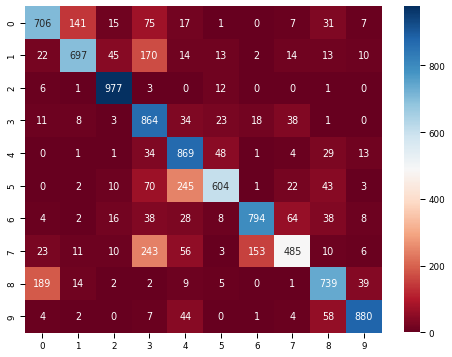

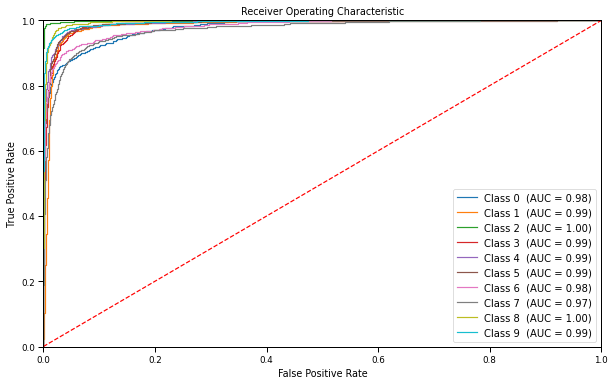




KNeighborsClassifier()

Accuracy Score 

Training Score :  0.9851833333333333
Testing  Score :  0.9145

Precision Score :  0.9173367507354273
Recall Score :  0.9145
F1 Score :  0.9142327346167854

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1000
           1       0.85      0.96      0.90      1000
           2       1.00      0.99      0.99      1000
           3       0.92      0.90      0.91      1000
           4       0.83      0.95      0.89      1000
           5       0.94      0.89      0.92      1000
           6       0.87      0.90      0.88      1000
           7       0.93      0.80      0.86      1000
           8       0.93      0.96      0.95      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000


Confusion Matrix


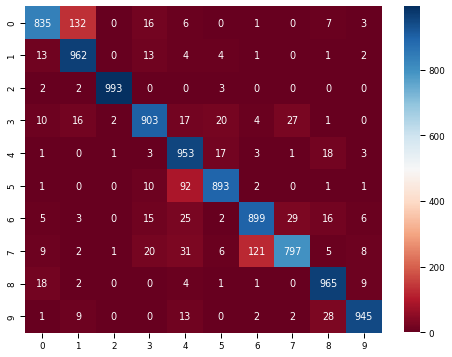

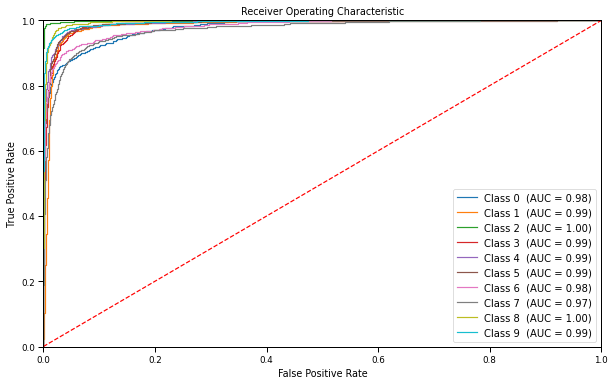




SVC()

Accuracy Score 

Training Score :  0.9816833333333334
Testing  Score :  0.9194

Precision Score :  0.9216218973115807
Recall Score :  0.9194
F1 Score :  0.9190868512968676

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1000
           1       0.86      0.94      0.90      1000
           2       0.98      0.99      0.99      1000
           3       0.91      0.91      0.91      1000
           4       0.84      0.95      0.89      1000
           5       0.95      0.89      0.92      1000
           6       0.90      0.92      0.91      1000
           7       0.93      0.82      0.87      1000
           8       0.94      0.99      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Confusion Matrix


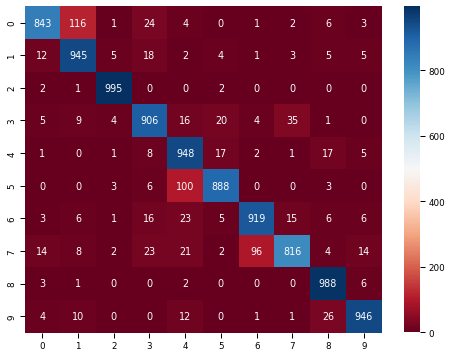

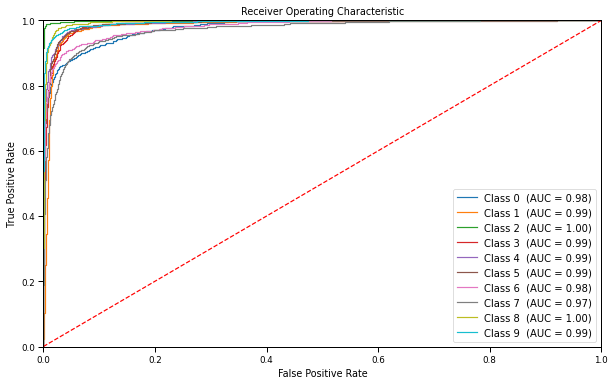




support vector machine : 0.9194
logistic regression : 0.8687
Gassian naive bayes : 0.7615
k nearest neighbors : 0.9145
Decision Tree       : 0.822
Random forest       : 0.8961


In [20]:
lr = LogisticRegression()
model(lr,x_train_pca25, x_test_pca25, y_train, y_test)
print('\n\n')
tree = DecisionTreeClassifier()
model(tree, x_train_pca25, x_test_pca25, y_train, y_test)
print('\n\n')
rf = RandomForestClassifier()
model(rf, x_train_pca25, x_test_pca25, y_train, y_test)
print('\n\n')
gnb = GaussianNB()
model(gnb, x_train_pca25, x_test_pca25, y_train, y_test)
print('\n\n')
knn = KNeighborsClassifier()
model(knn, x_train_pca25, x_test_pca25, y_train, y_test)
print('\n\n')
svm = SVC()
model(svm, x_train_pca25, x_test_pca25, y_train, y_test) 
print('\n\n')
print(f'support vector machine : {svm.score(x_test_pca25, y_test)}')
print(f'logistic regression : {lr.score(x_test_pca25, y_test)}')
print(f'Gassian naive bayes : {gnb.score(x_test_pca25, y_test)}')
print(f'k nearest neighbors : {knn.score(x_test_pca25, y_test)}')
print(f'Decision Tree       : {tree.score(x_test_pca25, y_test)}')
print(f'Random forest       : {rf.score(x_test_pca25, y_test)}')

### Dimensionality reduction by using PCA method  (size == 30)

In [21]:
pca30 = PCA(n_components=30)
x_train_pca30 = pca30.fit_transform(x_train_std)
x_test_pca30  = pca30.transform(x_test_std)

### MODELS  (size == 30)

LogisticRegression()

Accuracy Score 

Training Score :  0.9514333333333334
Testing  Score :  0.8746

Precision Score :  0.8758917872414244
Recall Score :  0.8746
F1 Score :  0.8738025033697044

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1000
           1       0.82      0.89      0.85      1000
           2       0.97      0.99      0.98      1000
           3       0.87      0.84      0.86      1000
           4       0.82      0.94      0.87      1000
           5       0.88      0.83      0.85      1000
           6       0.85      0.86      0.85      1000
           7       0.84      0.75      0.80      1000
           8       0.90      0.94      0.92      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000


Confusion Matrix


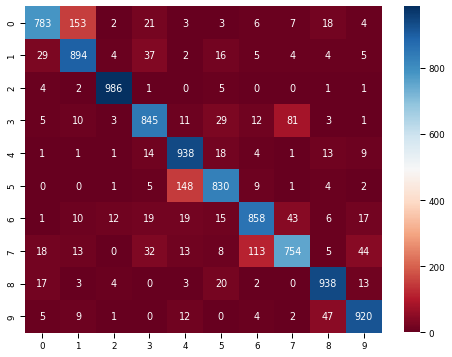

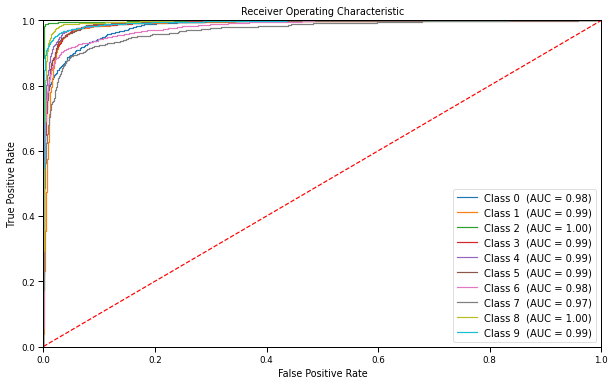




DecisionTreeClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.8203

Precision Score :  0.8206523245191057
Recall Score :  0.8203
F1 Score :  0.8196248934138919

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1000
           1       0.79      0.83      0.81      1000
           2       0.97      0.98      0.98      1000
           3       0.77      0.76      0.77      1000
           4       0.76      0.83      0.79      1000
           5       0.85      0.79      0.81      1000
           6       0.78      0.81      0.79      1000
           7       0.77      0.69      0.73      1000
           8       0.82      0.87      0.84      1000
           9       0.88      0.89      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000


Confusion Matrix


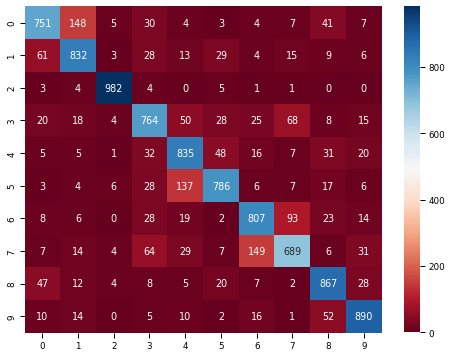

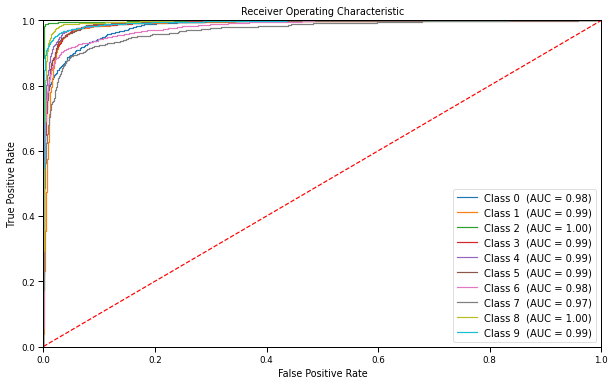




RandomForestClassifier()

Accuracy Score 

Training Score :  1.0
Testing  Score :  0.8973

Precision Score :  0.900059371840873
Recall Score :  0.8973
F1 Score :  0.8970802626673161

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1000
           1       0.85      0.94      0.89      1000
           2       1.00      0.99      0.99      1000
           3       0.90      0.91      0.90      1000
           4       0.80      0.92      0.86      1000
           5       0.92      0.84      0.88      1000
           6       0.88      0.87      0.88      1000
           7       0.90      0.80      0.85      1000
           8       0.88      0.95      0.92      1000
           9       0.96      0.93      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix


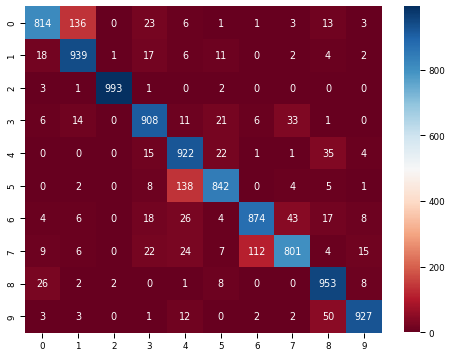

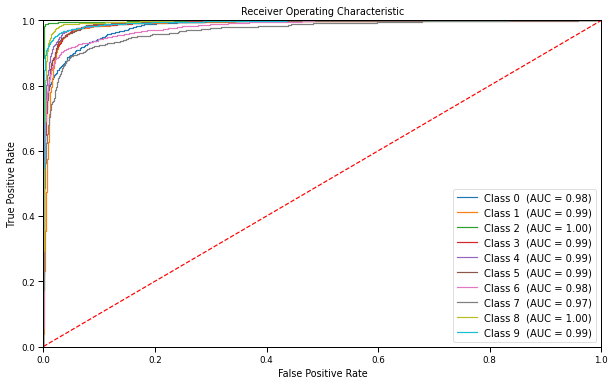




GaussianNB()

Accuracy Score 

Training Score :  0.8635666666666667
Testing  Score :  0.7505

Precision Score :  0.767397078582426
Recall Score :  0.7505
F1 Score :  0.7477569476759875

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.79      0.68      0.73      1000
           2       0.89      0.98      0.93      1000
           3       0.55      0.85      0.67      1000
           4       0.65      0.87      0.74      1000
           5       0.84      0.59      0.69      1000
           6       0.83      0.79      0.81      1000
           7       0.73      0.45      0.56      1000
           8       0.76      0.74      0.75      1000
           9       0.92      0.86      0.88      1000

    accuracy                           0.75     10000
   macro avg       0.77      0.75      0.75     10000
weighted avg       0.77      0.75      0.75     10000


Confusion Matrix


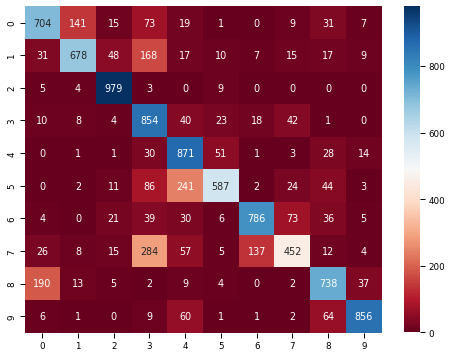

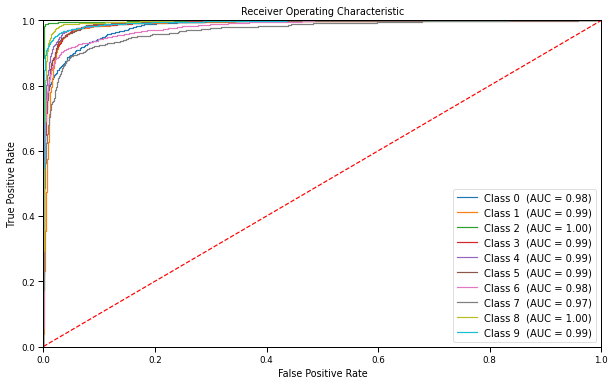




KNeighborsClassifier()

Accuracy Score 

Training Score :  0.9857666666666667
Testing  Score :  0.9149

Precision Score :  0.9180024596585541
Recall Score :  0.9149
F1 Score :  0.9147400642276529

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1000
           1       0.86      0.96      0.90      1000
           2       1.00      0.99      0.99      1000
           3       0.92      0.90      0.91      1000
           4       0.82      0.95      0.88      1000
           5       0.94      0.89      0.91      1000
           6       0.88      0.91      0.89      1000
           7       0.93      0.80      0.86      1000
           8       0.93      0.96      0.95      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000


Confusion Matrix


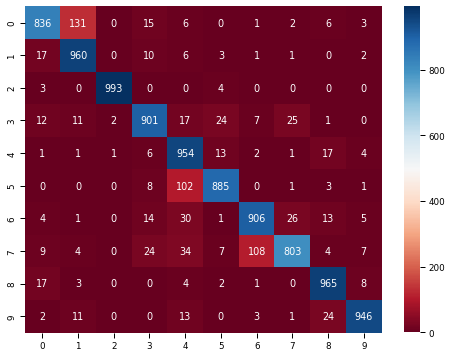

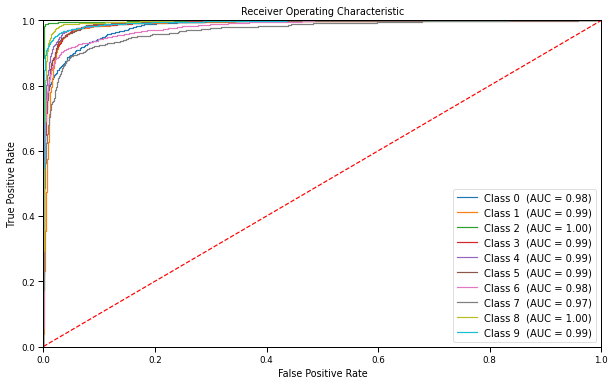




SVC()

Accuracy Score 

Training Score :  0.9833
Testing  Score :  0.9223

Precision Score :  0.9245137123651591
Recall Score :  0.9223
F1 Score :  0.9220991368447161

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1000
           1       0.87      0.94      0.90      1000
           2       0.98      1.00      0.99      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.95      0.89      1000
           5       0.95      0.87      0.91      1000
           6       0.91      0.92      0.92      1000
           7       0.94      0.84      0.89      1000
           8       0.94      0.99      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Confusion Matrix


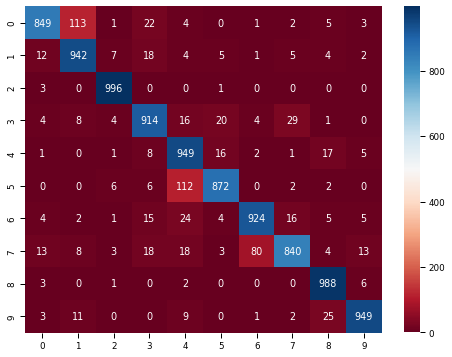

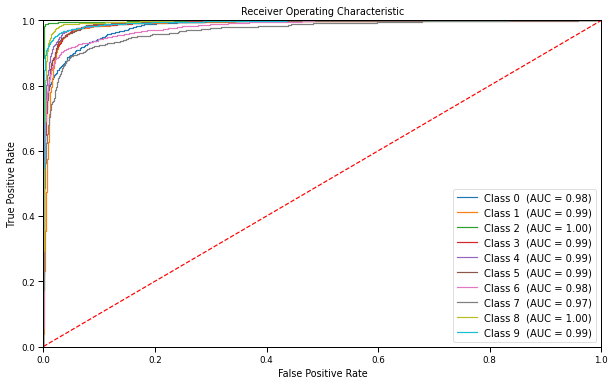




support vector machine : 0.9223
logistic regression : 0.8746
Gassian naive bayes : 0.7505
k nearest neighbors : 0.9149
Decision Tree       : 0.8203
Random forest       : 0.8973


In [22]:
lr = LogisticRegression()
model(lr,x_train_pca30, x_test_pca30, y_train, y_test)
print('\n\n')
tree = DecisionTreeClassifier()
model(tree, x_train_pca30, x_test_pca30, y_train, y_test)
print('\n\n')
rf = RandomForestClassifier()
model(rf, x_train_pca30, x_test_pca30, y_train, y_test)
print('\n\n')
gnb = GaussianNB()
model(gnb, x_train_pca30, x_test_pca30, y_train, y_test)
print('\n\n')
knn = KNeighborsClassifier()
model(knn, x_train_pca30, x_test_pca30, y_train, y_test)
print('\n\n')
svm = SVC()
model(svm, x_train_pca30, x_test_pca30, y_train, y_test) 
print('\n\n')
print(f'support vector machine : {svm.score(x_test_pca30, y_test)}')
print(f'logistic regression : {lr.score(x_test_pca30, y_test)}')
print(f'Gassian naive bayes : {gnb.score(x_test_pca30, y_test)}')
print(f'k nearest neighbors : {knn.score(x_test_pca30, y_test)}')
print(f'Decision Tree       : {tree.score(x_test_pca30, y_test)}')
print(f'Random forest       : {rf.score(x_test_pca30, y_test)}')